<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2021</h1>
<h2>Pràctica 1 - Grafs, Dijkstra</h2>
</center>
</div>

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<div class="alert alert-info">
<h2>Avís general per a les Pràctiques de Laboratori</h2>

És molt important <b>comentar tot el vostre codi</b>. Comentar el codi no només facilita a altres persones que el llegeixin la compressió del que esteu fent, sinó també a vosaltres mateixos durant el procés de disseny i implementació. D'aquesta forma podreu entendre el vostre propi codi encara que faci molt temps que no el consulteu. A més, a l'hora de ser corregits, un codi comentat s'entén molt millor, la qual cosa ajuda a traslladar al professor les idees que teníeu a l'intentar implementar-lo i encara més en el cas que no ho hagueu pogut acabar-ho amb èxit. No cal comentar cada línia, però si el que fa cada part.

En segon lloc, és molt important <b>respectar les capçaleres de les funcions i estructura de la funció ```return```</b> que s'indiquin a l'enunciat. Tot i que llegim i corregim els vostres codis en detall, fem servir correctors automàtics per guiar i agilitzar el procés i saber quines solucións funcionen i quines no ja d'entrada. 

Axí doncs, si es demana que la funció tingui la següent estructura: 

```python
def exercici1(param1, param2):
    # implementació de la solució
    return resultat 
```

És important que en el notebook existeixi aquesta funció i que no canvieu el nom dels paràmetres ni el tipus de dada retornada.
    
</div>




## maze.py

La llibreria auxiliar ```maze.py```, conté les funcions necessàries per crear i dibuixar laberints aleatoris. A continuació destaquem les funcions més rellevants tot i que podeu obrir el fitxer i investigar.

- ```Maze(x_num, y_num, seed=None, p_down=0.2, p_build=0)```: Aquesta funció construeix i retorna un laberint aleatori de dimensió $x_\text{num} \times y_\text{num}$. El paràmetre $\textit{seed}$ permet fixar una llavor de forma que sempre es generi el mateix laberint. És interessant que, un cop hagueu programat la solució dels exercicis, proveu de modificar-lo per veure que funciona en diferents casos. Els paràmetres $p_\text{down}$ i $p_\text{build}$ són probabilitats de destrucció d'una paret o de construcció. Així, si $p_\text{down}$ és proper a 1, s'eliminen gairebé totes les parets del laberint, creant molts camins entre totes les cel·les. En canvi, si $p_\text{build}$ és proper a 1, es crearan parets que faran que el laberint no tingui solució per a gairebé cap parella de cel·les.

- ```maze.display_maze(height=200, plot_path=False)```: Com el seu nom indica, ens mostra el laberint que hem creat. Podem definir l'alçada del dibuix i l'amplada s'ajusta automàticament. Com veurem, podem assignar un camí a cada laberint. Si hi ha un camí assignat, el podem mostrar cridant la funció amb la variable _plot\_path = True_.

- ```maze.maze_graph()```: Aquesta funció, que no rep cap paràmetre per entrada, ens retorna un graf de la classe nx.Graph() que representa el laberint.

- ```maze.set_path(path)```: Donat un camí definit com una sequència de nodes, el podem assignar al laberint usant aquesta funció. Recorda que si vols visualitzar un camí assignat, pots fer-ho cridant a ```display_maze(plot_path=True)```.

In [3]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *

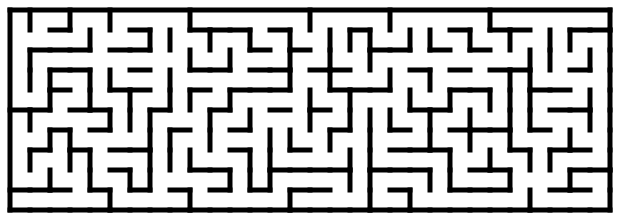

In [4]:
# Creem un laberint amb X cel·les horitzontals i Y cel.les verticals i el mostrem.
# Observeu que hem definit un 'seed'. Això vol dir que, tot i que el laberint es genera de forma aleatòria,
# tindreu tots el mateix.
maze = Maze(30, 10, seed=17)
maze.display_maze(height=200)

La longitud del camí mínim és 53


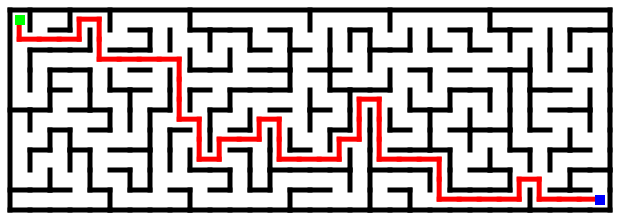

In [5]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
G = maze.maze_graph()

# La llibreria networX ja té una funció per trobar el camí mínim
A = 0                              # Node orígen (Verd) 
B = len(G.nodes)-1                 # Node destí  (Blau)
pth = nx.shortest_path(G, A, B)
print('La longitud del camí mínim és',len(pth))

# Afegim aquest camí al nostre laberint
maze.set_path(pth)

# Mostrem el resultat
maze.display_maze(plot_path=True, height=200)

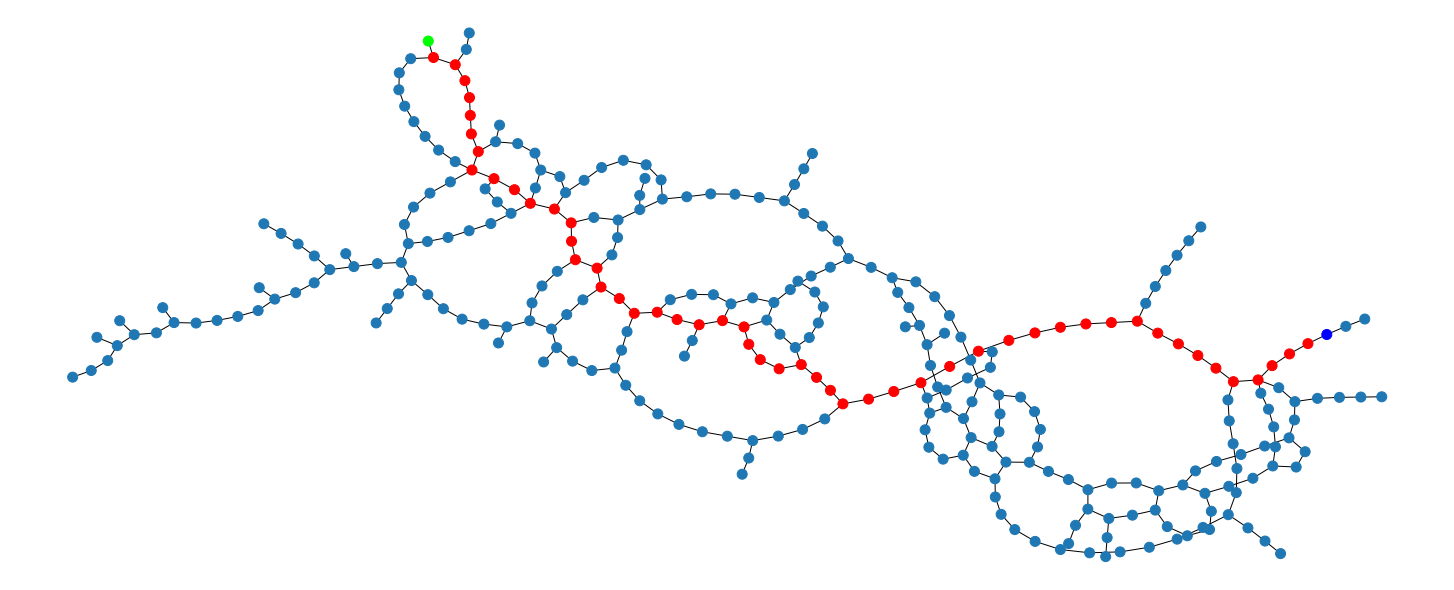

In [6]:
# Mostrem el laberint com un graf.
plt.figure(figsize=(20,8))

# Definim el color dels nodes.
# Si el node és el punt A (inici) el pintem verd, si es el node B (final) el pintem blau, si es un node del camí, vermell i finalment
# deixem el color per defecte de networkx per a la resta de nodes.

colorA, colorB, colorPTH, colorDEF = '#00ff00', '#0000ff', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorPTH if n in pth else colorDEF for n in G.nodes]

# Existeixen moltes formes diferents de dibuixar els graphs. La Kamada-Kawai ens permet veure el graf com un 'graf de força'.
# Aquests tipus de visualitzacions intenten que les arestes no se superposin.
pos = nx.kamada_kawai_layout(G).items()

# Com que estem dibuixant en horitzontal, canviem les coordenades x i y de cada punt.
pos = {k: v[::-1] for k,v in pos}

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=100)

<div class="alert alert-success">
<h1>Problema 1: Dijkstra</h1>
<p>
    Implementeu l'algorisme <b>Dijkstra</b>. Donat un graf de la llibreria networX, la funció <b>dijkstra()</b> ha de retornar, si existeix, el camí mínim entre dos nodes. <br>
    A la capçalera del mètode s'expliquen els paràmetres d'entrada i els paràmetres de sortida de la funció. <br>
    Recordeu que és necessari <b>no canviar l'estructura de la funció</b>. No canvieu ni el nom de la funció, ni el nom dels paràmetres d'entrada ni els de sortida. <br>
    - <b>Quina complexitat té aquest algorisme?</b>
</p>    
    
</div>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Codi </h3></p> </center>
<p>
<h3>Params</h3>
<ul>
<li>:G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph</li>
<li>:origin: Índex del node orígen
<li>:destination: Índex del node destí
<li>En Python, podeu representar l'infinit com a float('inf')
</ul>
<br>
<h3>Returns</h3>
Un <b>diccionari</b> amb tres elements:
<ul>
<li>:path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination'.</li>
<li>:expanded: El nombre de nodes que s'han visitat per trobar la solució</li>
<li>:distance: La distancia del camí mínim entre 'origin' i 'destination'</li>
<ul>

</p>
</div>


In [7]:
# En Python, podeu representar l'infinit com a float('inf')
import heapq
def dijkstra(G, origin, destination):
    
    path = []   
    expanded = 0
    
    not_visited = [] 
    prev = dict()
    dist = dict()
    distance = 0
    
    #ara cal inicialitzar els valors del graf
    for x in G.nodes():

        prev[x] = None
        dist[x] = float('inf')
        
    #en cas que el desti no estigui en el graf
    if destination not in G.nodes:
        return 0
    
    #ajustem la distancia al node origen
    dist[origin] = 0
    
    #'lafegim al path
    not_visited.append((0, origin))
    
    #mentre el path no sigui 0
    while (len(not_visited) != 0):
        actual = heapq.heappop(not_visited)[1]
                
        #si es el desti parem
        if (actual == destination):
            break

        #sino, seguim explorant els seu veins
        for n in G.neighbors(actual):
            expanded += 1
            
            aux = dist[actual] + 1
            
            #si la distancia trobada es menor actualizem
            if (aux < dist[n]):
                dist[n] = aux
                prev[n] = actual
                heapq.heappush(not_visited, (aux, n))
   
     
    distance = dist[destination]
    
    temp=destination
    while temp!=origin:
        path.insert(0,temp)
        temp=prev[temp]
    path.insert(0,origin)
    
    
    return {
        'path': path,
        'expanded': expanded,
        'distance': distance
    }

La distància del camí més curt és: 52
Els nodes que hem expandit són: 643


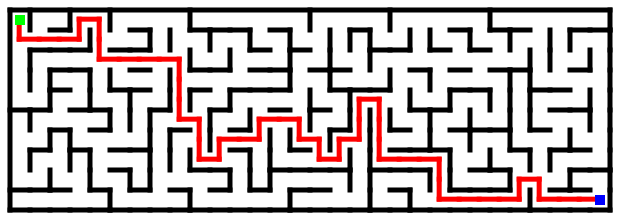

In [8]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=17)
G = maze.maze_graph()

# Punt inici i punt final
A = 0
B = len(G.nodes)-1

# Cridem a la punció que heu creat
values = dijkstra(G, A, B)

print('La distància del camí més curt és:', values['distance'])
print('Els nodes que hem expandit són:', values['expanded'])

# Mostrem el camí
maze.set_path(values['path'])
maze.display_maze(plot_path=True, height=200)

<div class="alert alert-success">
<h1>Problema 2: Checkpoint</h1>
<p>
    Implementeu una funció anomenada <b>checkpoint()</b> que, donat un graf, un node origen, un node destí i un node extra, trobi el camí més curt des del node origen fins el node destí passant pel node extra.<br>
    - <b>Quina és la complexitat d'aquest algorisme?</b><br>
</p>    
    
</div>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Codi </h3></p> </center>
<p>
<h3>Params</h3>
<ul>
<li>:G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph</li>
<li>:origin: Índex del node orígen</li>
<li>:destination: Índex del node destí</li>
<li>:extra: Índex d'un node extra per on ha de passar el camí</li>
</ul>
<br>
<h3>Returns</h3>
Un <b>diccionari</b> amb dos elements:
<ul>
<li>:path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per 'extra'..</li>
<li>:distance: La distància del camí.</li>
<ul>

</p>
</div>

In [16]:
def checkpoint(G, origin, destination, extra):

    values = dijkstra(G, origin, extra)
    values2 = dijkstra(G, extra, destination)
    
    return {'path': values['path'] + values2['path'], 
            'distance': values['distance'] + values2['distance']}

La distàcia del camí més curt que passa per E és: 56


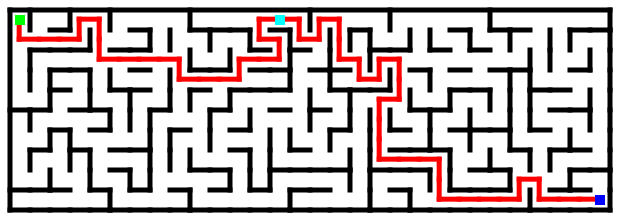

In [17]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=17)
G = maze.maze_graph()

# Definim l'inici, el fi i un node extra
A = 0
B = len(G.nodes)-1
E = 13

# La funció set_value ens permet 'activar' un node per a que surti dibuixat al laberint.
maze.set_value(E, 1)

values = checkpoint(G, A, B, E)
print('La distàcia del camí més curt que passa per E és:', values['distance'])
maze.set_path(values['path'])
maze.display_maze(plot_path=True, height=200)

# De la mateixa forma la funció set_value també ens permet 'desactivar' els nodes.
maze.set_value(E, 0)

<div class="alert alert-success">
<h1>Problema 3: Checkpoints list</h1>
<p>
    Implementeu una funció anomenada <b>checkpoints_list()</b> que, donat un graf, un node origen, un node destí i una llista de nodes extres, trobi el camí més curt des del node origen fins el node destí passant per tots els nodes extra, en qualsevol ordre.<br>
    - <b>Quina és la complexitat d'aquest algorisme?</b><br>
</p>    
    
</div>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Codi </h3></p> </center>
<p>
<h3>Params</h3>
<ul>
<li>:G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph</li>
<li>:origin: Índex del node orígen</li>
<li>:destination: Índex del node destí</li>
<li>:extras: Llista d'índexs de nodes per on ha de passar el camí.</li>
</ul>
<br>
<h3>Returns</h3>
Un <b>diccionari</b> amb dos elements:
<ul>
<li>:path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per 'extras'</li>
<li>:distance: La distància del camí.</li>
<ul>

</p>
</div>

In [20]:
import itertools

def checkpoints_list1(G, origin, destination, extras):
    
    distance = 0    
    path = []    
    _dist = []    #lista de las distancias para obtener la minima
    _ord = []    
    ordering = [origin]
    paths = list(itertools.permutations(extras))   #guardem en una llista tots els camins possibles
                                                   
    for possible_path in paths:
        actual = origin
        
        for extra in possible_path:
            _return = dijkstra(G, actual, extra)
            distance += _return['distance']
            actual = extra
            ordering.append(extra)          
        
        _return = dijkstra(G, actual, destination)
        ordering.append(destination)
        distance += _return['distance']      
        _dist.append(distance) 
        _ord.append(ordering)
        distance = 0
        ordering = [origin]
        
    distance = min(_dist)
    ordering = [origin] + _ord[_dist.index(min(_dist))] + [destination]
    
    #una vez ordenada la lista de extras, hacemos dijkstra de punto a punto

    for i in range (0, len(ordering)-1, 1) :
        
        values = dijkstra(G, ordering[i],ordering[i+1])       
        path.extend(values['path'])
        
    return {
        'path': path,
        'distance': distance
    }    
    

La distàcia del camí més curt que passa per E és: 80


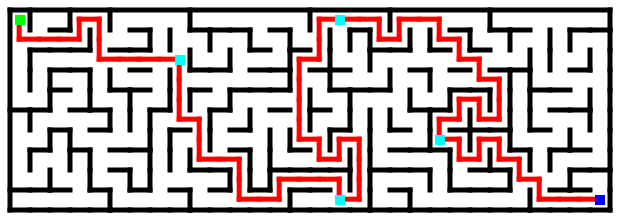

In [21]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=17)
G = maze.maze_graph()

# Definim l'inici, el fi i node extres
A = 0
B = len(G.nodes)-1
E = [286, 201, 16, 68]

# La funció set_values ens permet 'activar' nodes per a que surtin dibuixat al laberint.
maze.set_values(E, 1)

values = checkpoints_list1(G, A, B, E)
print('La distàcia del camí més curt que passa per E és:', values['distance'])

maze.set_path(values['path'])
maze.display_maze(plot_path=True, height=200)

# De la mateixa forma la funció set_values també ens permet 'desactivar' els nodes.
maze.set_values(E, 0)

<div class="alert alert-success">
<h1>Problema 4: Holes</h1>
<p>
    Implementeu una funció anomenada <b>holes()</b> que, donat un graf, un node orígen, un node destí, una llista de nodes i un paràmetre enter, trobi el camí més curt entre orígen i destí.<br>
    Si el camí passa per un dels nodes de la llista, se li aplicarà una penalització.<br>
    - <b>Quina complexitat té aquest algorisme?</b>
</p>    
    
</div>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Codi </h3></p> </center>
<p>
<h3>Params</h3>
<ul>
<li>:G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph</li>
<li>:origin: Índex del node orígen</li>
<li>:destination: Índex del node destí</li>  
<li>:holes_list: Una llista de punts que tindran penalització</li>
<li>:penalty: Valor enter de penalització</li>
</ul>
<br>
<h3>Returns</h3>
Un <b>diccionari</b> amb dos elements:
<ul>
<li>:path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' </li>
<li>:distance: La distància del camí.</li>
<ul>

</p>
</div>

In [24]:
# En Python, podeu representar l'infinit com a float('inf')
import heapq
def holes(G, origin, destination, holes_list=[], penalty=50):
    
    path = []      
    not_visited = [] 
    prev = dict()
    dist = dict()
    distance = 0
    
    #ara cal inicialitzar els valors del graf
    for x in G.nodes():
        prev[x] = None
        dist[x] = float('inf')
        
    #en cas que el desti no estigui en el graf
    if destination not in G.nodes:
        return 0
    
    #ajustem la distancia al node origen
    dist[origin] = 0
    
    #'lafegim al path
    not_visited.append((0, origin))
    
    #mentre el path no sigui 0
    while (len(not_visited) != 0):
        actual = heapq.heappop(not_visited)[1]
                
        #si es el desti parem
        if (actual == destination):
            break

        #sino, seguim explorant els seu veins
        for n in G.neighbors(actual):
            
            #si el node esta a hole list, hem de sumar la penalització
            if actual not in holes_list:
                aux = dist[actual] + 1            
            else:
                aux = dist[actual] + penalty + 1
                
            #si la distancia trobada es menor actualizem
            if (aux < dist[n]):
                dist[n] = aux
                prev[n] = actual
                heapq.heappush(not_visited, (aux, n))
   
     
    distance = dist[destination]
    
    temp=destination
    while temp!=origin:
        path.insert(0,temp)
        temp=prev[temp]
    path.insert(0,origin)
    
    
    return {
        'path': path,
        'distance': distance
    }

Penalització: 2
Cost: 58


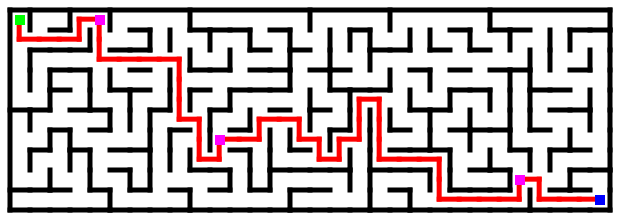

Penalització: 5
Cost: 61


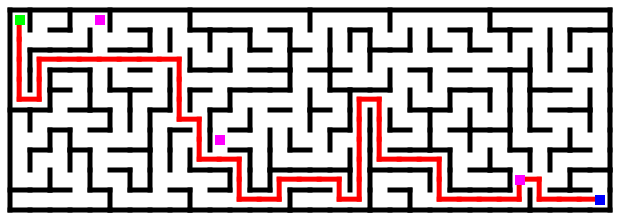

Penalització: 10
Cost: 62


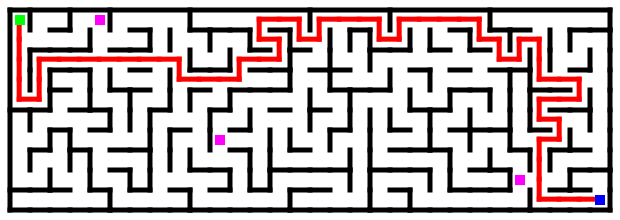

In [25]:
# Proveu el vostre algorisme!
A = 0
B = len(G.nodes)-1
holes_list = [4, 190, 265]
color = (255, 0, 255)

penalties = [2,5,10]
for v in penalties:
    maze.set_values(holes_list, 1, color)
    values = holes(G, A, B, holes_list, v)
    
    maze.set_path(values['path'])
    print('Penalització:',v)
    print('Cost:',values['distance'])
    maze.display_maze(plot_path=True, height=200)

    maze.set_values(holes_list, 0, color)

<div class="alert alert-success">
<h1>Problema 5: Money</h1>
<p>
    Afegirem recompenses (valors negatius) al passar per determinades cel·les del laberint.<br>
    - <b>Podem aplicar Dijkstra en aquesta situació?</b> <br><br>
    Suposem un cas especial de laberint: Només podem avançar cap a la dreta (est) o cap a baix (sud). Així, el nostre laberint es pot reconvertir en un graf dirigit ja que els camins nomes permeten una direcció.<br>
    - <b>En aquesta nova suposició, quin algorisme ens permet trobar el camí més curt?</b> <br>
    - <b>Per què hem hagut de limitar les direccions permeses?</b><br><br>
    Adapta l'algorisme que ens permet trobar el camí més curt (tenint en compte les recompenses) a aquest problema en concret. La funció, anomenada <b>money()</b> rep com a paràmetres un node origen, un node destí i un diccionari $\{n: w\}$ on $n$ és l'índex d'un node i $w$ és el valor de recompensa del node.
</p>    
    
</div>

In [29]:
def money(G, origin, destination, money_dict):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :money_dict: Diccionari de parelles {n: w} on 'n' és l'índex d'un node i 'w' és el valor de la recompensa al passar-hi
    
    Returns
    =======
    Un diccionari amb dos elements:
    
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination'.
    :distance: La distància del camí.    
    """
    # inicialitzar el graf. Posem distàncies a INFINIT menys el node origen que 
    # té distància 0. Per això ho fem recorrent tots els vèrtexs del graf
    
    return {'path': [],
           'distance': 0}

La distància del camí més curt és: 0


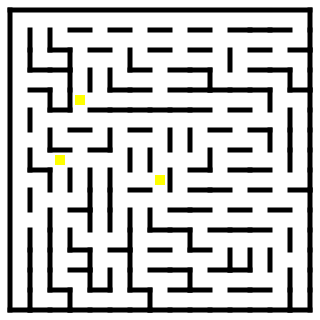

In [30]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(15, 15, p_down=0.4, p_build=0, directed=True, seed=1)
G = maze.maze_graph()

# Punt inici i punt final
A = 0
B = len(G.nodes)-1
money_dict = {63: -10, 127: -10, 107:-100}

for k,v in money_dict.items():
    maze.set_value(k, v, color=(255,255,0))

# Cridem a la punció que heu creat
values = money(G, A, B, money_dict)
print('La distància del camí més curt és:', values['distance'])

# Mostrem el camí
maze.set_path(values['path'])
maze.display_maze(plot_path=True, height=300)

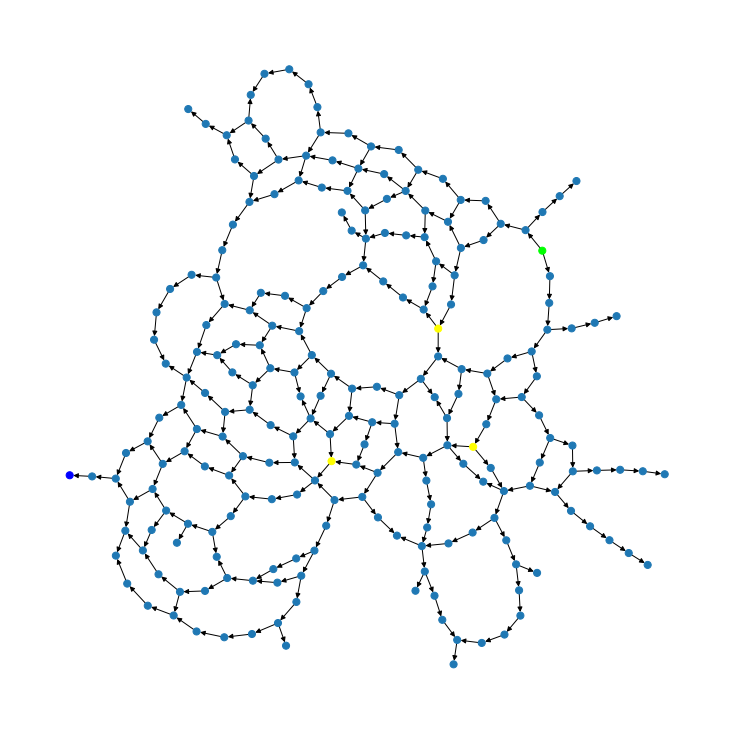

In [31]:
plt.figure(figsize=(10,10))

colorA, colorB, colorM, colorPTH, colorDEF = '#00ff00', '#0000ff', '#ffff00', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorM if n in money_dict else colorPTH if n in values['path'] else colorDEF for n in G.nodes]

# NOTA: Els grafs dirigits tenen problemes a l'hora de dibuixar-se. El podem transformar a no dirigit només per
# agafar-ne les posicions dels nodes.
pos = nx.kamada_kawai_layout(G.to_undirected())

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=50)

<div class="alert alert-warning">
<h1>Resposta a les preguntes</h1>
<h3>Problema 1</h3>
<p>
    - <b>Quina complexitat té aquest algorisme?</b> O(n^2) per el doble bucle
</p>   
<h3>Problema 2</h3>
<p>
    - <b>Quina complexitat té aquest algorisme?</b>O(n^2)
</p>   
<h3>Problema 3</h3>
<p>
    - <b>Quina complexitat té aquest algorisme?</b>n! perque amb itertools fas totes les permutacions
</p>   
<h3>Problema 4</h3>
<p>
    - <b>Quina complexitat té aquest algorisme?</b>O(n^2)
</p>   
<h3>Problema 5</h3>    
<p>
    - <b>Podem aplicar Dijkstra en aquesta situació?</b> Si perque el valor negatiu no esta en l'aresta sino que es un valor del node.
</p>
<p> 
    - <b>En aquesta nova suposició, quin algorisme ens permet trobar el camí més curt?</b> Bellman-ford
</p>
<p>  
    - <b>Per què hem hagut de limitar les direccions permeses?</b> Per a evitar la formació de cicles, sobretot de cicles negatius on bellman-ford no funcionaria
</p>    
    
</div>

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>13 d'Octubre a les 23:55</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b> (No entregueu maze.py ni cap altre fitxer extra). El notebook ha de tenir com a nom:
</p>
<p>
    <code>L2_Grup_Cognom_Nom.ipynb</code>
</p>
    <br>
On 'Grup' és una sola lletra que identifica el grup on esteu matriculats. Els grups disponibles són: A, B, C, F.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>